# Predicting Coronary Heart Disease (CHD)

# Business Understanding 

# Introduction

Cardiovascular (heart) diseases are a leading cause of death globally, taking an estimated 17.9 million lives each year and imposing a significant burden on public health systems (WHO, 2023). Cardiometabolic, behavioral, environmental, and social risk factors are major drivers of heart diseases.

According to WHO, timely and accurate prediction of heart diseases likelihood can play a crucial role in improving patient outcomes and optimizing healthcare resources. 

In this project we will be focusing on coronary heart disease (CHD). We will leverage a publicly available Heart disease dataset containing various health-related features to develop predictive models that can assess the risk of CHD in patients.

The primary objective of this project is to build a comprehensive heart disease prediction system that can assist healthcare professionals in identifying individuals at high risk of developing CHD related complications to enable early intervention.

## Problem statement

The increasing prevalence of heart diseases, a prominent cause of premature mortality globally, is attributed to rising behavioral risk factors like unhealthy diet, physical inactivity, tobacco use, and excessive alcohol consumption. These behaviors manifest in individuals as elevated blood pressure, increased blood glucose, raised blood lipids, and obesity. Recognizing these "intermediate risk factors" is crucial in primary care settings as they signal heightened susceptibility to heart-related complications. Notably, 4 out of 5 heart disease-related deaths occur prematurely, impacting individuals under 70 years. However, positive modifications in behavioral factors have demonstrated the potential to mitigate heart disease risk. In this project, leveraging a dataset encompassing parameters such as age, gender, blood pressure, cholesterol levels, and other pertinent medical indicators, our objective is to construct predictive models adept at identifying individuals with an elevated risk of developing heart-related complications.

## Objectives

* To to build a comprehensive heart disease prediction system that can assist healthcare professionals in identifying individuals at high risk of developing CHD related complications to enable early intervention.

*  To Uncover meaningful patterns and risk factors associated with heart disease, enabling targeted preventive measures and personalized treatment plans

* To Assist healthcare professionals in early detection and proactive management of coronary heart disease.

* To Create Machine Learning-based predictive models that can show likelihood of an individual developing CHD in 10 years time for use by phyisicians in targeting individuals for prioritized prevetantive interventions

# Data Understanding

The dataset is available on the Kaggle website. The classification goal is to predict whether a patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

The columns include

* Sex: male or female
* Age: Age of the patient;
* Current Smoker: whether or not the patient is a current smoker.
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.
* BP Meds: whether or not the patient was on blood pressure medication
* Prevalent Stroke: whether or not the patient had previously had a stroke 
* Prevalent Hyp: whether or not the patient was hypertensive
* Diabetes: whether or not the patient had diabetes 
* Tot Chol: total cholesterol level 
* Sys BP: systolic blood pressure 
* Dia BP: diastolic blood pressure
* BMI: Body Mass Index 
* Heart Rate: heart rate 
* Glucose: glucose level 
10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


# Import Relevant Packages

In [69]:
# Basic data manipultion and analysis
import numpy as np
import pandas as pd

# Data visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

## Data sourcing

In [70]:
# Load the heart disease dataset
heart_df = pd.read_csv('framingham.csv')

# Display the first five rows of the dataset
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [71]:
# Function to print the shape of the DataFrame
def data_shape(heart_df):
    print("Data Shape:")
    print(f"Number of Rows: {heart_df.shape[0]}")
    print(f"Number of Columns: {heart_df.shape[1]}\n")

# Function to display information about the data
def data_info(heart_df):
    print("Data Information:")
    print(heart_df.info())

# Function to check for missing values
def data_missing(heart_df):
    print("\nMissing Values:")
    print(heart_df.isnull().sum())
# Function to identify and display duplicate rows
def identify_duplicates(heart_df):
    duplicates = heart_df[heart_df.duplicated()]
    print("\nDuplicate Rows:")
    print(duplicates)
# Function to display descriptive statistics of numerical columns
def data_describe(heart_df):
    print("\nDescriptive Statistics:")
    print(heart_df.describe())


In [72]:
# Function to explore the dataset
def explore_dataset(heart_df):
    data_shape(heart_df)
    data_info(heart_df)
    data_missing(heart_df)
    identify_duplicates(heart_df)
    data_describe(heart_df)

In [73]:
# Call the fuction to explore the dataset
explore_dataset(heart_df)

Data Shape:
Number of Rows: 4238
Number of Columns: 16

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null  

## Data preprocessing

### Handling missing values

In [74]:
# Define a fuction to calculate the percentage of duplicates in each column of our dataset
def calculate_missing_percentage(heart_df):
    # Calculate the total number of records
    total_records = len(heart_df)

    # Check for missing values and calculate the percentage for each column
    missing_count = heart_df.isnull().sum()
    missing_percentage = (missing_count / total_records) * 100

    # Create a DataFrame to store the missing values and percentages
    missing_data_df = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percentage
    })

    # Sort the DataFrame in ascending order based on the percentage of missing values
    missing_data_df = missing_data_df[missing_data_df['Missing Values'] > 0]
    missing_data_df.sort_values(by='Percentage (%)', ascending=True, inplace=True)

    return missing_data_df

# Assuming your dataset is named 'heart_data'
# Call the function to calculate missing percentages
missing_data_df = calculate_missing_percentage(heart_df)

# Display the DataFrame with missing values and percentages
print(missing_data_df)

            Missing Values  Percentage (%)
heartRate                1        0.023596
BMI                     19        0.448325
cigsPerDay              29        0.684285
totChol                 50        1.179802
BPMeds                  53        1.250590
education              105        2.477584
glucose                388        9.155262


In [75]:
# Define a function to drop missing values for columns with missing values less than 2%

def drop_missing_values(heart_df, columns_to_drop):
    # Drop rows with missing values in the specified columns
    heart_df.dropna(subset=columns_to_drop, inplace=True)

    return heart_df

# Columns with missing values to be dropped
columns_to_drop = ["heartRate", "BMI", "cigsPerDay", "totChol", "BPMeds"]

# Adjust the column names in the 'columns_to_drop' list if needed
# For example, if there are leading or trailing whitespaces in the column names:
columns_to_drop = [col.strip() for col in columns_to_drop]

# Call the function to drop missing values in the specified columns
heart_df = drop_missing_values(heart_df, columns_to_drop)

In [76]:
# Handle glucose and eduaction columns
def handle_missing_values(heart_df):
    # Replace missing values in the glucose column with the mean
    mean_glucose = heart_df['glucose'].mean()
    heart_df['glucose'].fillna(mean_glucose, inplace=True)

    # Replace missing values in the education column with the mode
    mode_education = heart_df['education'].mode().iloc[0]
    heart_df['education'].fillna(mode_education, inplace=True)

    return heart_df

# Call the function to handle missing values
heart_df = handle_missing_values(heart_df)

# Verify if there are any missing values left after imputation
print(heart_df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


## Outlier Detection.

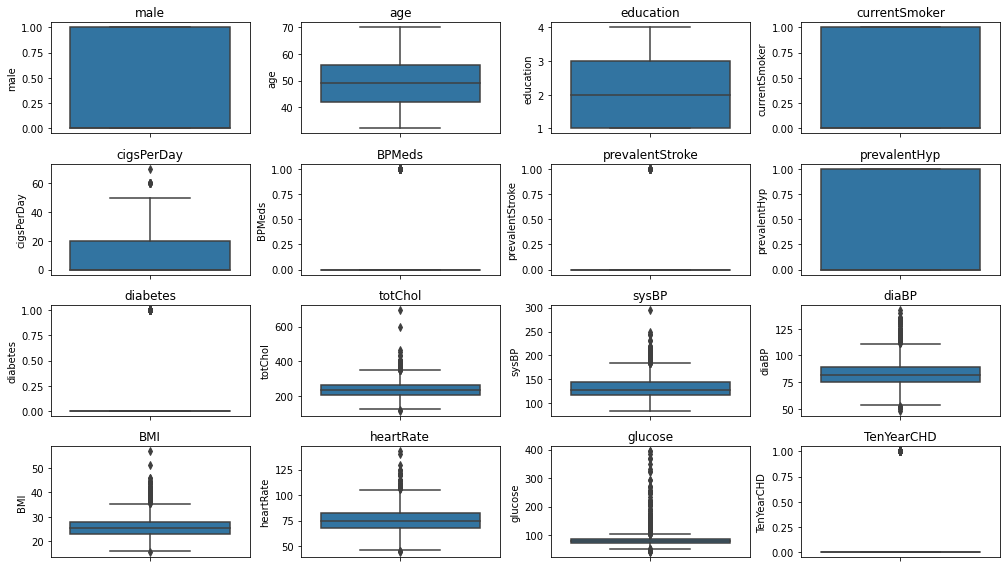

In [9]:
# Select numerical features for visualization
numerical_features =heart_df.columns.tolist()

# Box plots for numerical features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=heart_df, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()


Since we have outliers in our dataset from our visuals we will use Winsorization approach to handle the outliers.Winsorization replaces the extreme values with the nearest non-outlier values to limit their impact while preserving the data's distribution. We'll apply Winsorization to the columns with outliers

In [77]:
# Define the function for Winsorization
def winsorize(heart_df, columns, lower_percentile=0.01, upper_percentile=0.99):
    for col in columns:
        lower_bound = heart_df[col].quantile(lower_percentile)
        upper_bound = heart_df[col].quantile(upper_percentile)
        heart_df[col] = np.clip(heart_df[col], lower_bound, upper_bound)
    return heart_df

# Specify the columns with outliers
columns_with_outliers = ['heartRate', 'BMI', 'cigsPerDay', 'totChol', 'diaBP']

# Apply Winsorization to the specified columns
heart_df = winsorize(heart_df, columns_with_outliers)


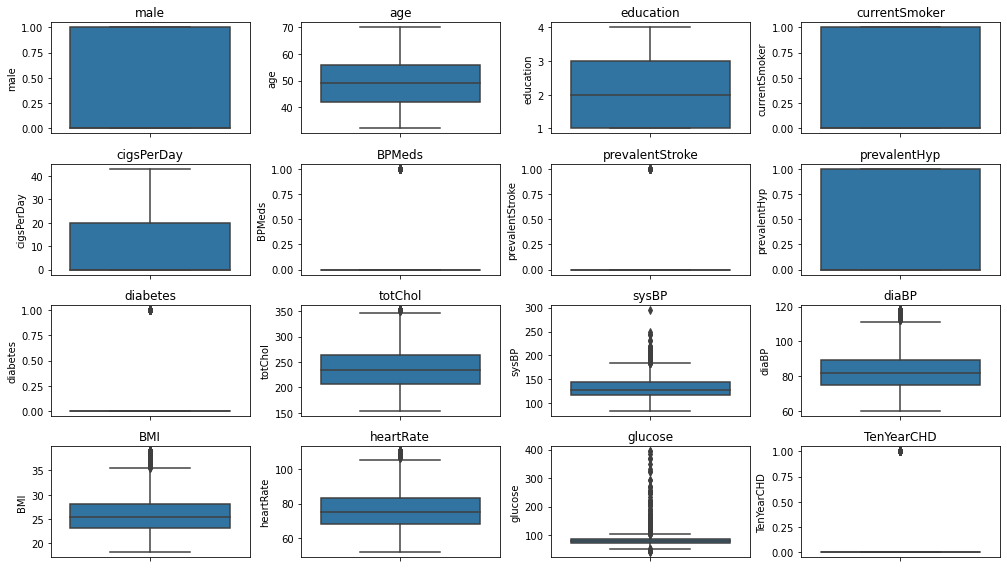

In [11]:
# Visualisation after Winsorization approach
# Box plots for numerical features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=heart_df, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

## Feature engineering

BMI (Body Mass Index) is a useful indicator for categorizing individuals into different weight categories. By creating BMI categories, we can provide additional information to the model that may capture different levels of health risks associated with weight.

The BMI (Body Mass Index) values are categorized into different weight groups using the following criteria:

 * Underweight: BMI < 18.5 (1)
 * Normal Weight: 18.5 <= BMI < 24.9 (2)
 * Overweight: 25 <= BMI < 29.9 (3)
 * Obese: BMI >= 30 (4)

In [87]:
def categorize_bmi(bmi_value):
    if bmi_value < 18.5:
        return "Underweight"
    elif 18.5 <= bmi_value < 24.9:
        return "Normal Weight"
    elif 25 <= bmi_value < 29.9:
        return "Overweight"
    else:
        return "Obese"

# Assuming 'heart_data' is the DataFrame containing the heart disease dataset
heart_df['BMI_Category'] = heart_df['BMI'].apply(categorize_bmi)

The age values will be categorized into different age groups using the following criteria:

 * Young Adult: Age < 30
 * Adult: 30 <= Age < 45
 * Middle-Aged Adult: 45 <= Age < 60
 * Senior: Age >= 60

In [88]:
import numpy as np

# Define the age bins and labels
age_bins = [20, 40, 60, 80, np.inf]
age_labels = ['20-39', '40-59', '60-79', '80+']

# Assuming 'heart_data' is the DataFrame containing the heart disease dataset
heart_df['Age_Group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

In [89]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 0 to 4237
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4088 non-null   int64   
 1   age              4088 non-null   int64   
 2   education        4088 non-null   float64 
 3   currentSmoker    4088 non-null   int64   
 4   cigsPerDay       4088 non-null   float64 
 5   BPMeds           4088 non-null   float64 
 6   prevalentStroke  4088 non-null   int64   
 7   prevalentHyp     4088 non-null   int64   
 8   diabetes         4088 non-null   int64   
 9   totChol          4088 non-null   float64 
 10  sysBP            4088 non-null   float64 
 11  diaBP            4088 non-null   float64 
 12  BMI              4088 non-null   float64 
 13  heartRate        4088 non-null   float64 
 14  glucose          4088 non-null   float64 
 15  TenYearCHD       4088 non-null   int64   
 16  Age_Group        4088 non-null   category


In [92]:
# Change the count of each category in the BMI_Category column
heart_df['BMI_Category'].value_counts()

Normal Weight    1770
Overweight       1688
Obese             574
Underweight        56
Name: BMI_Category, dtype: int64

In [93]:
# Change the count of each category in the Age_Group column
heart_df['Age_Group'].value_counts()

40-59    2893
60-79     655
20-39     540
80+         0
Name: Age_Group, dtype: int64

# Explotary Data Analysis (EDA)

#### Univariate Analysis

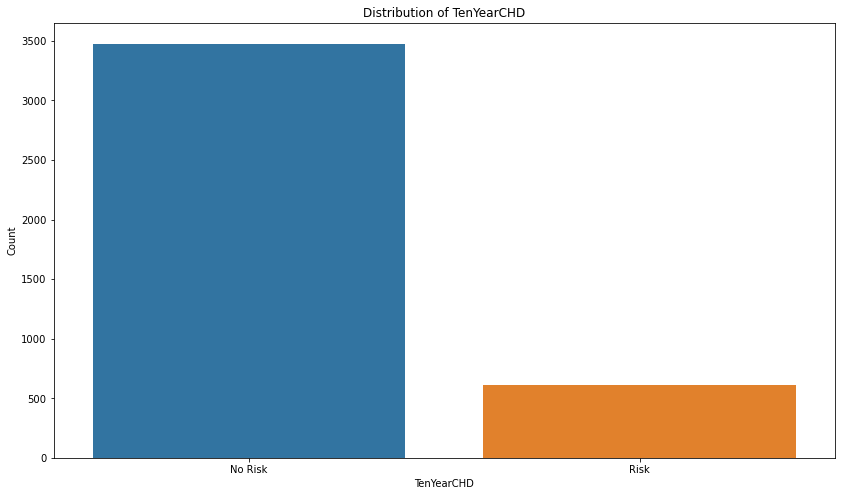

In [96]:
# Plotting the distribution of the target variable 'TenYearCHD'
plt.figure(figsize=(14, 8))
sns.countplot(data=heart_df, x='TenYearCHD')
plt.title('Distribution of TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.show()

The countplot above indicates there is a class imbalance in the target variable. Further analysis to balance the class will be done

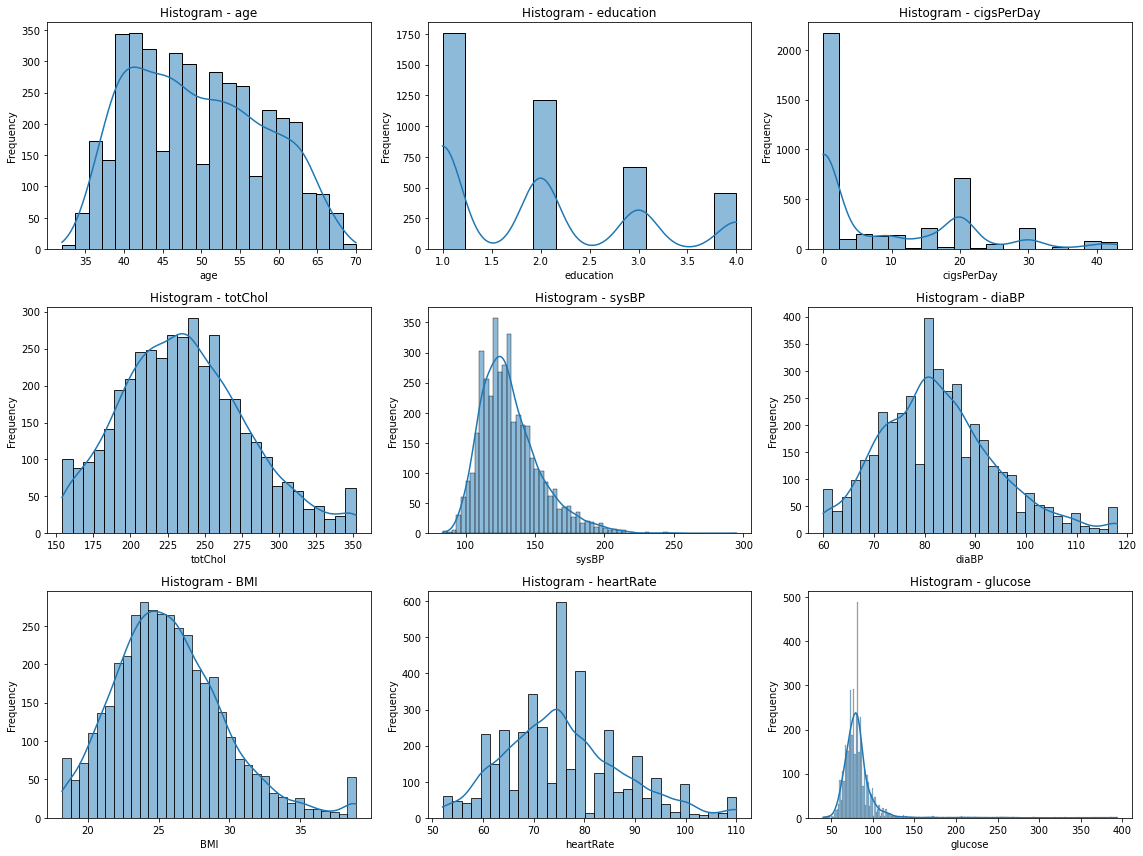

In [84]:
#visualizations and distributions for numerical variables
# Numerical variables in the dataset
numerical_columns = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Plotting histograms for numerical variables
plt.figure(figsize=(16, 12))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(heart_df[var], kde=True)
    plt.title(f'Histogram - {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

###  Bivariate Analysis

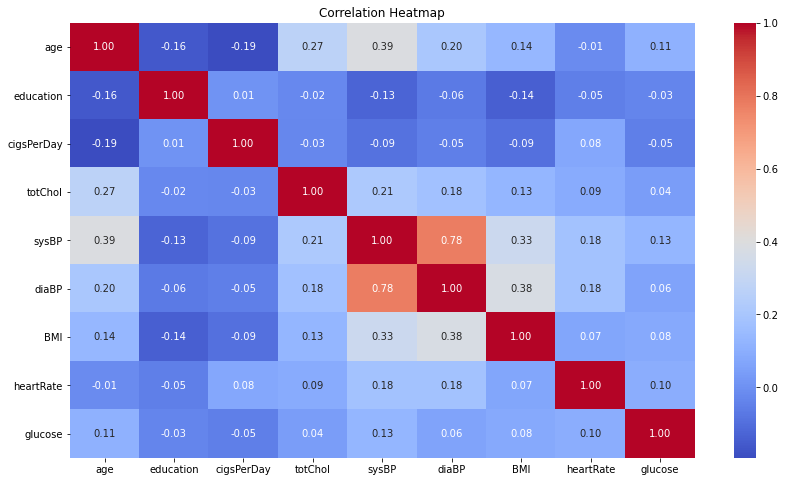

In [97]:
# Correlation matrix
correlation_matrix = heart_df[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [98]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age_Group,BMI_Category
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,20-39,Overweight
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40-59,Overweight
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40-59,Overweight
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60-79,Overweight
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40-59,Normal Weight


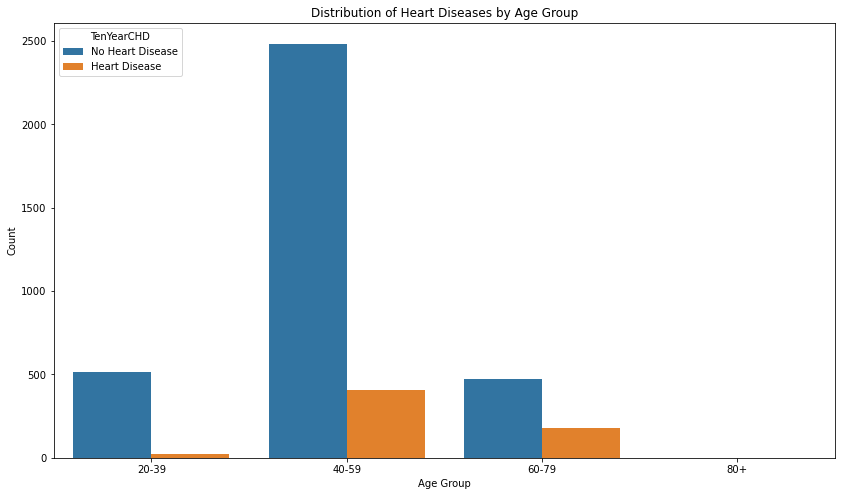

In [99]:
# Create a bar plot to show the distribution of heart diseases across age groups
plt.figure(figsize=(14, 8))
sns.countplot(x='Age_Group', hue='TenYearCHD', data=heart_df)
plt.title('Distribution of Heart Diseases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='TenYearCHD', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

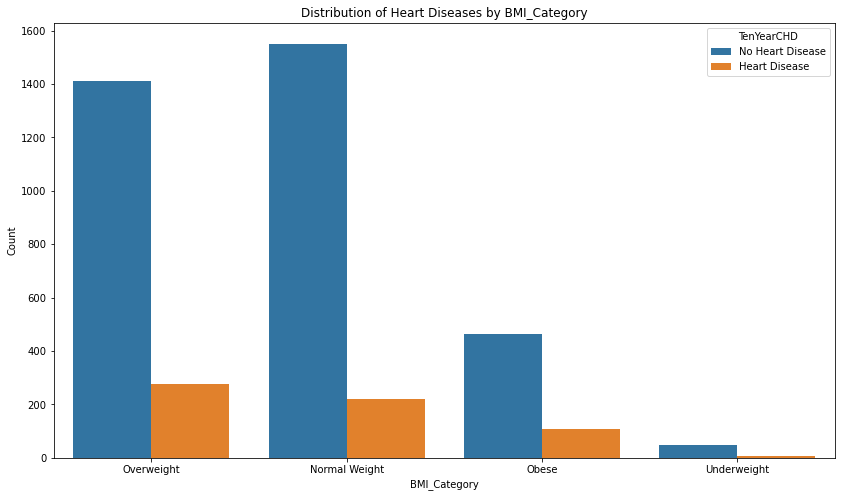

In [100]:
# Create a bar plot to show the distribution of heart diseases across BMI_Category
plt.figure(figsize=(14, 8))
sns.countplot(x='BMI_Category', hue='TenYearCHD', data=heart_df)
plt.title('Distribution of Heart Diseases by BMI_Category')
plt.xlabel('BMI_Category')
plt.ylabel('Count')
plt.legend(title='TenYearCHD', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

### Multivariate Analysis

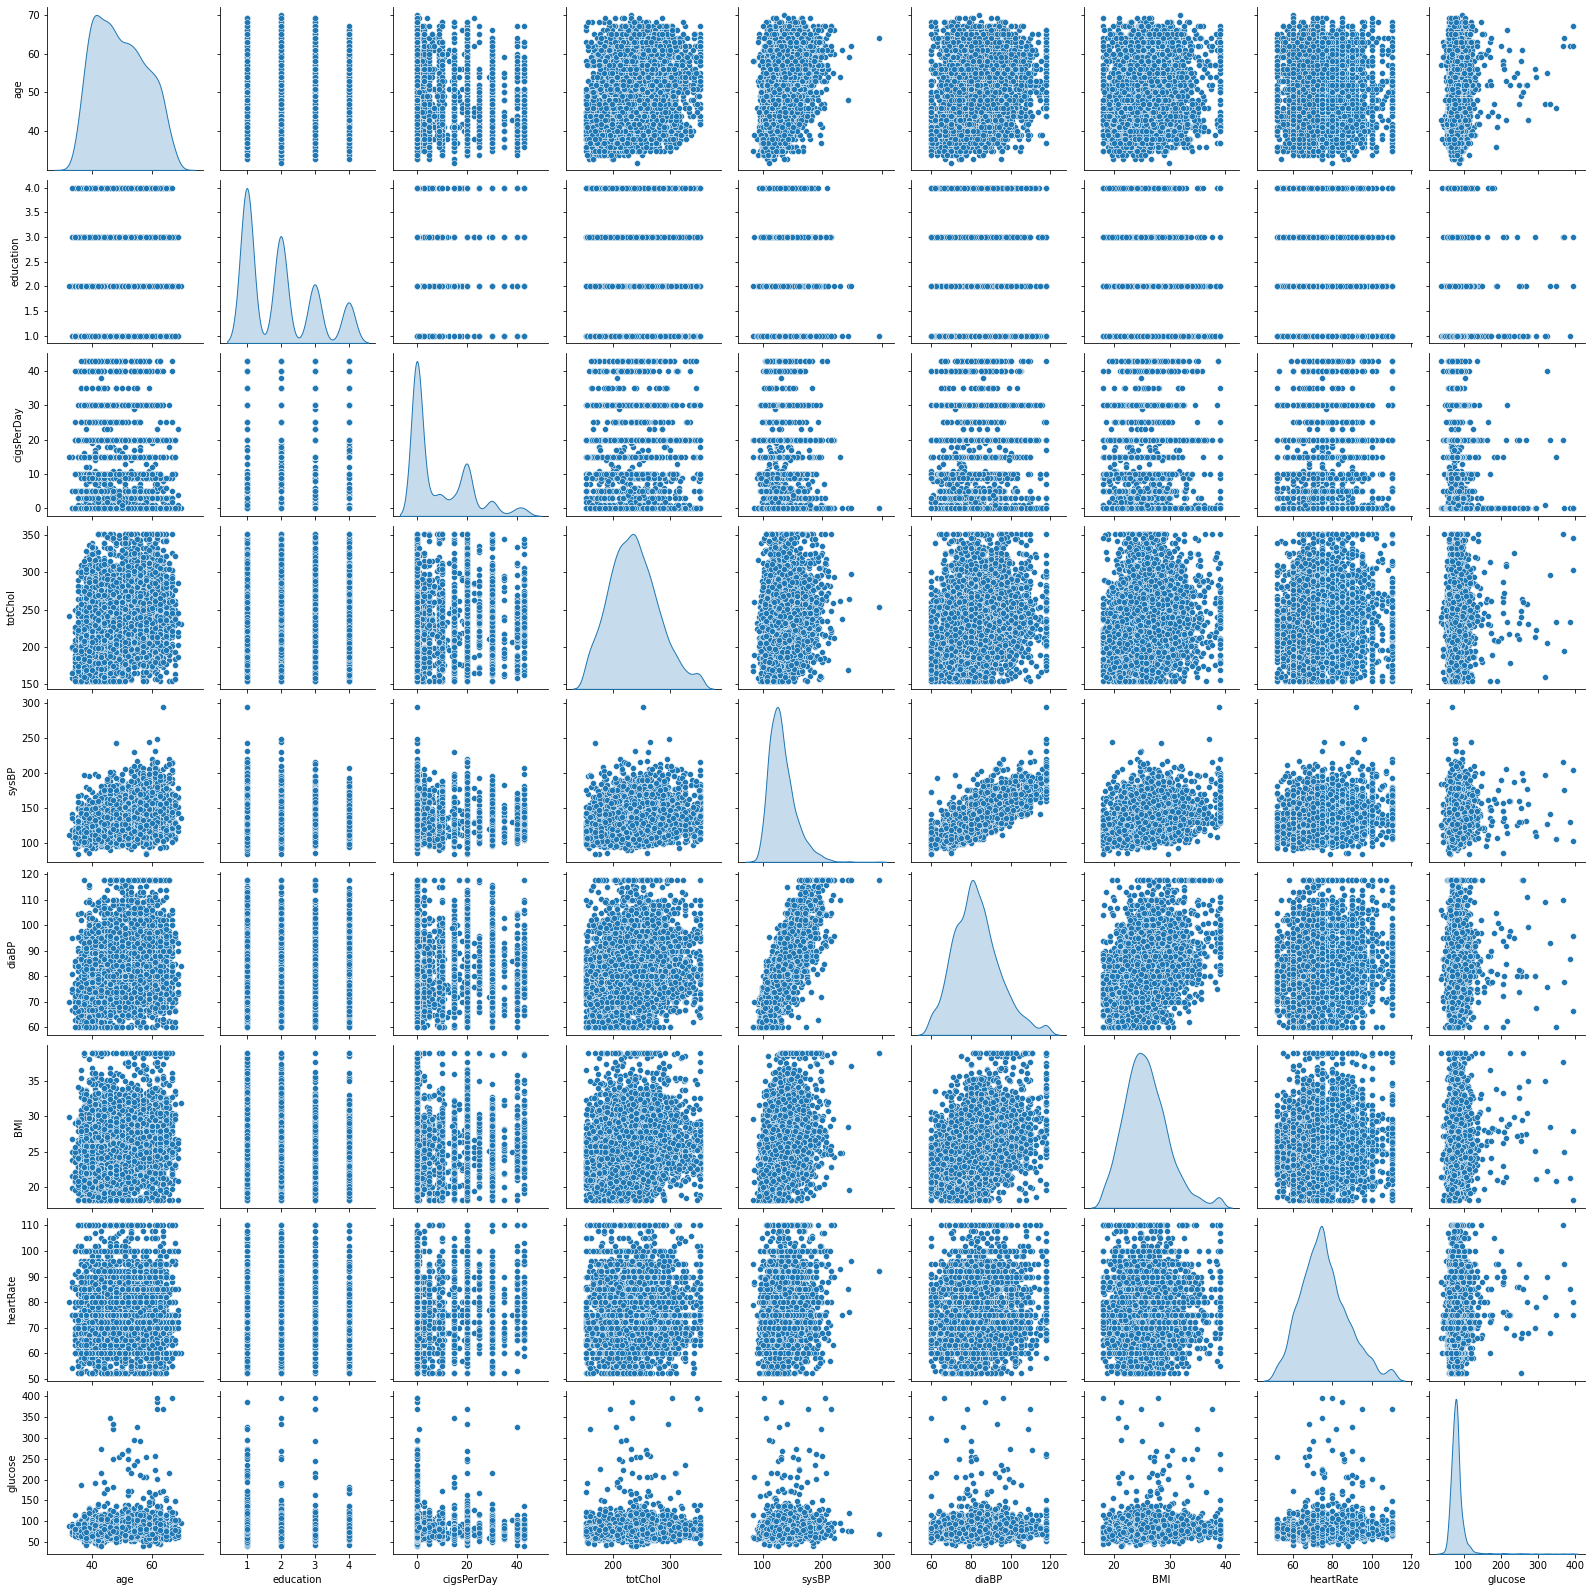

In [101]:
#scatterplot matrix
# Plotting scatterplot matrix
sns.pairplot(heart_df[numerical_columns], diag_kind='kde')
plt.show()

## Split features and target variable

In [102]:
X = heart_df.drop(['TenYearCHD', 'BMI_Category', 'Age_Group'], axis=1)
y = heart_df['TenYearCHD']

### Balancing the Sample

In [103]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over_sampler = RandomOverSampler(sampling_strategy=0.5)  # Specify the desired ratio
under_sampler = RandomUnderSampler(sampling_strategy=1.0)  # Match the majority class
pipeline = Pipeline(steps=[('o', over_sampler), ('u', under_sampler)])

# Apply the pipeline to balance the classes
X_balanced, y_balanced = pipeline.fit_resample(X, y)

# Display class distribution
print(pd.Series(y_balanced).value_counts())

1    1738
0    1738
Name: TenYearCHD, dtype: int64


# Modeling

## Baseline model.

In [104]:

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Logistic Regression model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
baseline_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = baseline_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6422413793103449
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       364
           1       0.62      0.66      0.64       332

    accuracy                           0.64       696
   macro avg       0.64      0.64      0.64       696
weighted avg       0.64      0.64      0.64       696



###  Results interpretation

The model is about 64.2% accurate, meaning it correctly predicts whether a person has a Ten-Year Coronary Heart Disease risk or not for 64.2% of cases. It's reasonably good at identifying both risk and no risk, with 67% precision for no risk and 62% precision for risk. The model captures 63% of actual no-risk cases (recall) and identifies 66% of actual risk cases. The overall model performance, as measured by the F1-score (around 64%), is decent. In summary, the model is moderately accurate and effective in spotting both risk and no-risk instances of Ten-Year Coronary Heart Disease in the dataset.

# Decision Tree

In [110]:
# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the search
best_tree_model = grid_search.best_estimator_

# Train the best model
best_tree_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_tree = best_tree_model.predict(X_test_scaled)



## Model  Evaluation

In [111]:
# Evaluate the improved model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f'Improved Decision Tree Accuracy: {accuracy_tree}')
print('Improved Decision Tree Classification Report:\n', report_tree)

Improved Decision Tree Accuracy: 0.8347701149425287
Improved Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82       364
           1       0.76      0.96      0.85       332

    accuracy                           0.83       696
   macro avg       0.86      0.84      0.83       696
weighted avg       0.86      0.83      0.83       696



### Results interpretation


The improved Decision Tree model achieved an accuracy of approximately 83.5%, indicating that it correctly predicted whether individuals have or do not have a Ten-Year Coronary Heart Disease risk for a significant portion of the cases

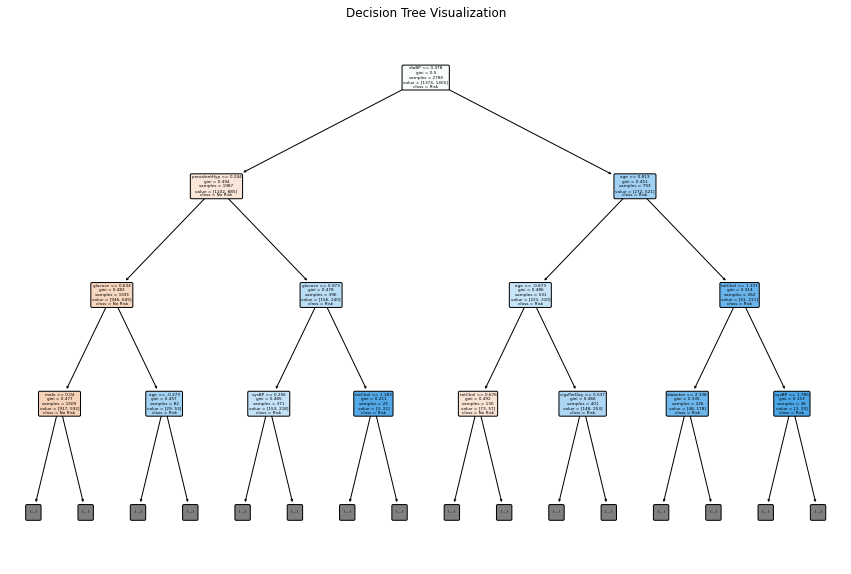

In [113]:
# Visualize the Decision Tree with a max depth of 3

plt.figure(figsize=(15, 10))
plot_tree(best_tree_model, feature_names=X_train.columns, class_names=['No Risk', 'Risk'], filled=True, rounded=True, max_depth= 3)
plt.title("Decision Tree Visualization")
plt.show()

# Random Forest

In [105]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Use the best parameters to train the final model
best_rf_model = grid_search_rf.best_estimator_

# Predictions on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)



## Evaluate the model

In [106]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf_tuned)
report = classification_report(y_test, y_pred_rf_tuned)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.882183908045977
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       364
           1       0.84      0.92      0.88       332

    accuracy                           0.88       696
   macro avg       0.88      0.88      0.88       696
weighted avg       0.89      0.88      0.88       696



## Interpretation

The model demonstrates strong performance with an accuracy of 88.2%, indicating that it correctly predicts whether individuals have or do not have a Ten-Year Coronary Heart Disease risk for the majority of cases. Precision and recall are well-balanced, with 92% precision for predicting no risk and 92% recall for predicting risk. This implies the model is highly accurate in identifying both classes. The overall F1-score of 88% further emphasizes the model's effectiveness. In summary, the model exhibits robust accuracy and precision, successfully distinguishing between individuals at risk and those without a Ten-Year Coronary Heart Disease risk in the dataset.

# Recommendation

1. Identification and Prioritization of High-Risk Patients:
Recognize the pivotal role of age, systolic blood pressure, prevalent hypertension, and diastolic blood pressure in predicting heart disease.

2. Age-Specific Focus:
Prioritize the 40-59 age group for targeted interventions, as they are most susceptible to heart disease.

3. Weight Management and Heart Health:
Provide tailored guidance for individuals falling within the overweight category, highlighting the higher likelihood of heart disease compared to those with normal weight, underweight, or obese individuals

4. Comprehensive Risk Assessment:
Encourage healthcare professionals to conduct a thorough evaluation of patients, taking into account multiple risk factors such as age, blood pressure, and weight status.

# Next steps

Promote Heart-Healthy Behaviors: Public health campaigns promoting heart-healthy lifestyles, including regular exercise, balanced diets, and smoking cessation, can play a vital role in reducing heart disease risk factors.

Collaboration with Medical Professionals: The integration of our predictive models into healthcare systems can assist doctors in making informed decisions and providing personalized treatment plans to patients. Collaboration between data scientists and medical experts is essential for accurate interpretation and implementation.

Continual Improvement: Machine learning models can be further refined and fine-tuned over time. Regular updates, model evaluations, and feedback loops with medical professionals ensure that the predictions remain accurate and relevant.